11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train shape: (60000, 784) Test shape: (10000, 784)

Training Shallow Autoencoder...

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3856 - val_loss: 0.1903
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1799 - val_loss: 0.1535
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1493 - val_loss: 0.1342
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1325 - val_loss: 0.1217
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1208 - val_loss: 0.1132
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1129 - val_loss: 0.1070
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1071 - val_loss: 0.1024
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1028 - val_loss: 0.0991
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0999 - val_loss: 0.0968
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0976 - val_loss: 0.0952
Ep

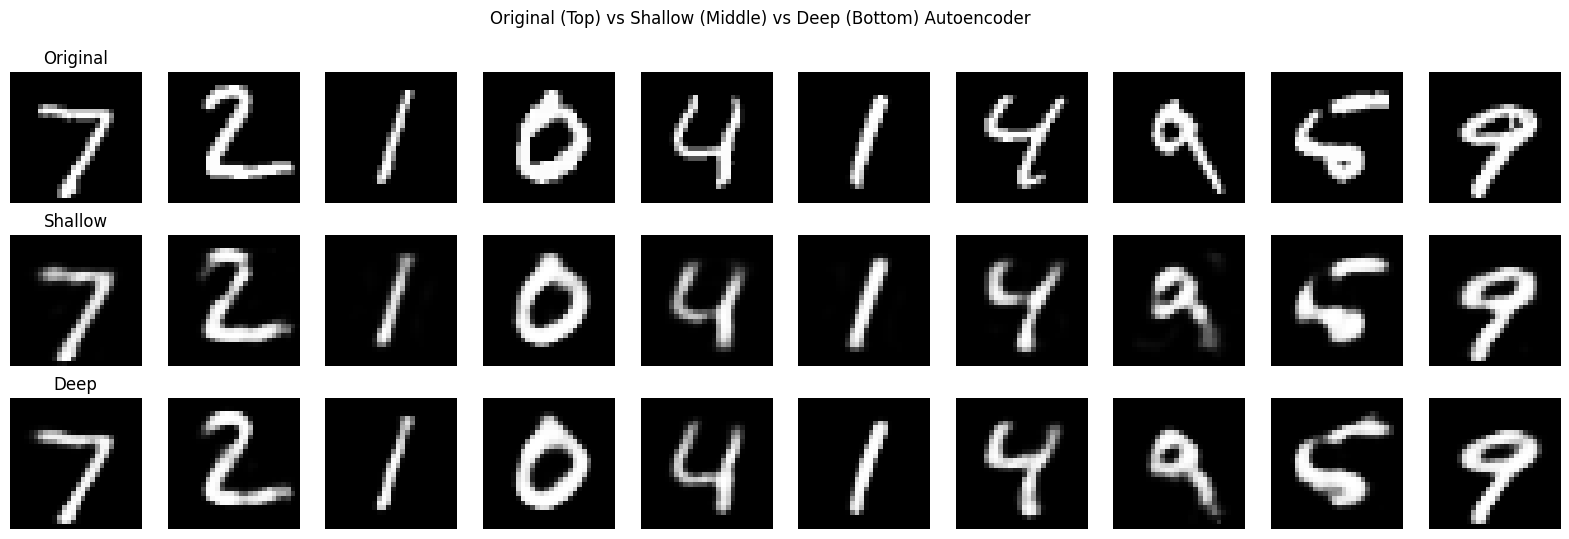

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense

#Load and Normalize MNIST Data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

#Flatten images to 1D
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

#Print shapes
print("Train shape:", x_train.shape, "Test shape:", x_test.shape)

#Shallow Autoencoder
def build_shallow_autoencoder(input_dim):
    input_img = Input(shape=(input_dim,))
    encoded = Dense(32, activation='relu')(input_img)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    return Model(input_img, decoded)

#Deep Autoencoder
def build_deep_autoencoder(input_dim):
    input_img = Input(shape=(input_dim,))
    encoded = Dense(128, activation='relu')(input_img)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    return Model(input_img, decoded)

#Build Models
input_dim = x_train.shape[1]
shallow_autoencoder = build_shallow_autoencoder(input_dim)
deep_autoencoder = build_deep_autoencoder(input_dim)

#Compile Models
shallow_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
deep_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#Train Shallow Autoencoder
print("\nTraining Shallow Autoencoder...\n")
shallow_autoencoder.fit(x_train, x_train,
                        epochs=50,
                        batch_size=256,
                        shuffle=True,
                        validation_data=(x_test, x_test))

#Train Deep Autoencoder
print("\nTraining Deep Autoencoder...\n")
deep_autoencoder.fit(x_train, x_train,
                     epochs=50,
                     batch_size=256,
                     shuffle=True,
                     validation_data=(x_test, x_test))

#Predict Reconstructed Images
shallow_reconstructed = shallow_autoencoder.predict(x_test)
deep_reconstructed = deep_autoencoder.predict(x_test)

#Plot Original vs Reconstructions
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    #Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    if i == 0:
        ax.set_title("Original")

    #Shallow
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(shallow_reconstructed[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    if i == 0:
        ax.set_title("Shallow")

    #Deep
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(deep_reconstructed[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    if i == 0:
        ax.set_title("Deep")
plt.suptitle("Original (Top) vs Shallow (Middle) vs Deep (Bottom) Autoencoder")
plt.show()










